In [1]:
import os
os.chdir("/home/spenser/Documents/time_series/")

In [ ]:
#this notebook implements the code from several sources to run alternative models for time series 

# FFA transform code to detect seasonality taken from:  https://www.kaggle.com/guisimon/time-frequency-analysis

# 
#SARIMA grid search taken from https://machinelearningmastery.com/how-to-grid-search-sarima-model-hyperparameters-for-time-series-forecasting-in-python/

# LSTM analysis for univariate time series taken from https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/


In [316]:
from datetime import datetime, timedelta
from collections import OrderedDict
dates = ["2002-01-01", "2019-01-29"]
start, end = [datetime.strptime(_, "%Y-%m-%d") for _ in dates]
months_years = OrderedDict(((start + timedelta(_)).strftime(r"%b-%y"), None) for _ in range((end - start).days)).keys()
months = OrderedDict(((start + timedelta(_)).strftime(r"%b"), None) for _ in range((end - start).days)).keys()

In [321]:
months_years_str = pd.DataFrame(months_years)
months_years_str.columns = ["time"]


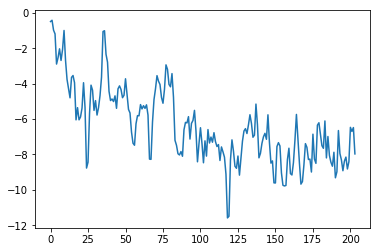

In [199]:
from pandas import read_csv
import pandas as pd
from pandas import datetime
from matplotlib import pyplot
import numpy as np
 
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
#def parser(x):
	#return datetime.strptime('190'+x, '%-%M-%d')
# Simulate an ARIMA(2,1,1) model 
# alphas=[0.5,-0.25] 
# betas=[-0.5]
import seaborn as sns
from statsmodels.tsa.arima_process import arma_generate_sample

np.random.seed(42)
max_lag = 30

n = int(204)
burn = 2000

alphas = np.array([0.5,-0.25])
betas = np.array([-0.5])

ar = np.r_[1, -alphas]
ma = np.r_[1, betas]

arma11 = arma_generate_sample(ar=ar, ma=ma, nsample=n, burnin=burn)
series = arma11.cumsum()
pyplot.plot(series)

In [551]:
from sklearn.metrics import mean_squared_error
X = series
X_df = pd.DataFrame(X)
X_months = pd.concat([X_df.reset_index(drop=True), pd.DataFrame(months)], axis=1)
X_months.columns = [["series", "months"]]


size = int(len(X) * 0.888)
train, test = X[0:size], X[size:len(X)]
train_months, test_months =  X_months[0:size], X_months[size:len(X)]

history = [x for x in train]
predictions = list()
print(len(train))
print(len(test))

181
23


In [350]:
month_dummies_train =  pd.get_dummies(train_months["months"])
#month_dummies_train = pd.concat([X_df.reset_index(drop=True), pd.DataFrame(month_dummies_train)], axis=1)

In [339]:
timeseries = timeseries.set_index(pd.date_range('20020501', periods=204, freq='M'))

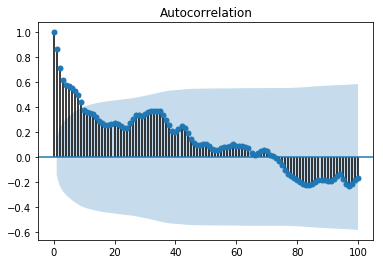

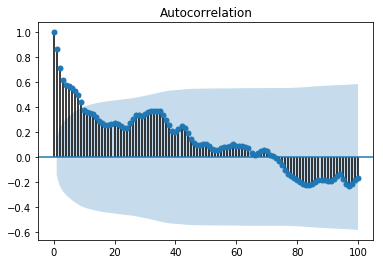

In [377]:
#Strong seasonal / sinusoidal pattern evident in ACF. Best to treat this first
from statsmodels.graphics.tsaplots import plot_acf


#Seasonal pattern evident here

plot_acf(train, lags=100)

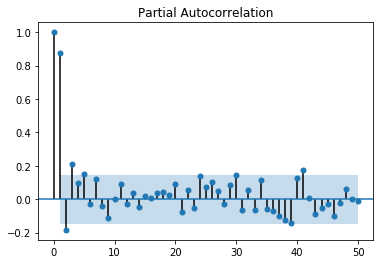

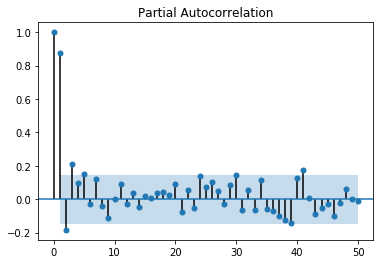

In [209]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(train, lags=50)

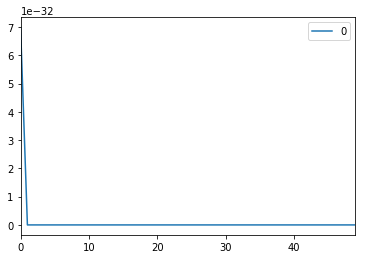

In [210]:
from statsmodels.stats.diagnostic import acorr_ljungbox

#Null hypothesis of ljung box -- reject if residuals don't have autocorrelation

box_p_values = acorr_ljungbox(train, lags = 50)[1]
box_p_values = pd.DataFrame(box_p_values)
box_p_values.plot()
## Values flat-line at p = 0,  autocorrelation exists which confirms trends on acf/pacf. 

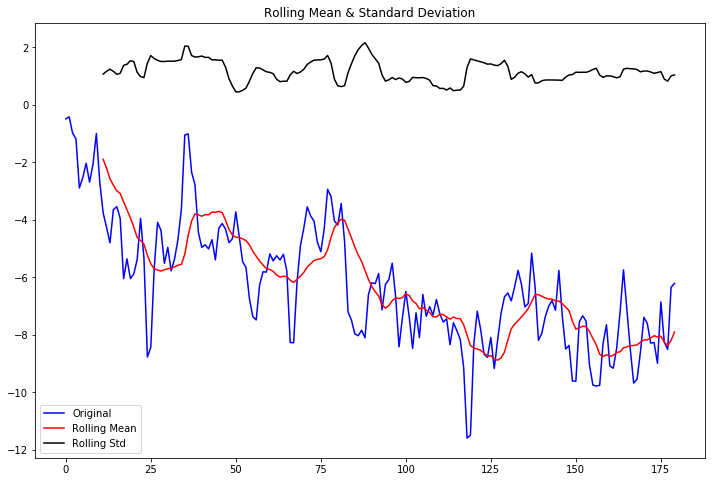

Results of Dickey-Fuller Test:
Test Statistic                  -3.286386
p-value                          0.015498
#Lags Used                       3.000000
Number of Observations Used    176.000000
Critical Value (1%)             -3.468062
Critical Value (5%)             -2.878106
Critical Value (10%)            -2.575602
dtype: float64


In [211]:
import matplotlib.pyplot as plt
### Testing stationarity 
## By itself this is an apparently stationary series. However, it does exhibit seasonality.

timeseries = pd.Series(train)
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    #X_np = np.array(timeseries)
    X_np = np.array(timeseries)
    X_np_s = X_np.reshape(1, len(X_np))
   
    dftest = adfuller(X_np_s[0], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    

test_stationarity(timeseries)

In [ ]:
from datetime import datetime, timedelta
from collections import OrderedDict
dates = ["2014-10-10", "2016-01-07"]
start, end = [datetime.strptime(_, "%Y-%m-%d") for _ in dates]
OrderedDict(((start + timedelta(_)).strftime(r"%b-%y"), None) for _ in xrange((end - start).days)).keys()

/home/spenser/.conda/envs/gpu/lib/python3.7/site-packages/ipykernel_launcher.py:45: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
/home/spenser/.conda/envs/gpu/lib/python3.7/site-packages/ipykernel_launcher.py:53: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
/home/spenser/.conda/envs/gpu/lib/python3.7/site-packages/ipykernel_launcher.py:58: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
/home/spenser/.conda/envs/gpu/lib/python3.7/site-packages/ipykernel_launcher.py:64: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
/home/spenser/.conda/envs/gpu/lib/python3.7/site-packages/numpy/lib/function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/home/spenser/.conda/envs/gpu/lib/python3.7/site-packages/numpy/lib/function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divid

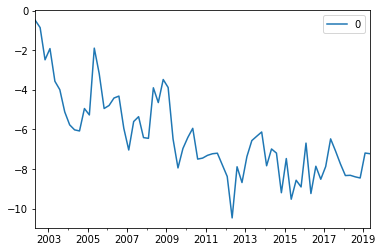

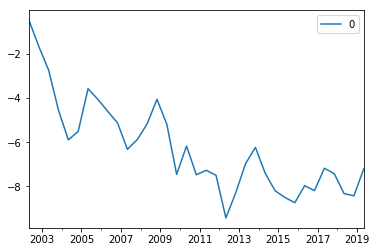

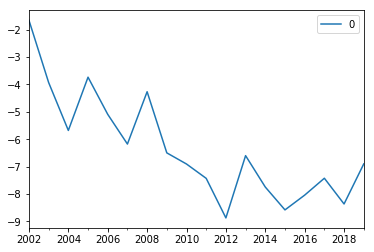

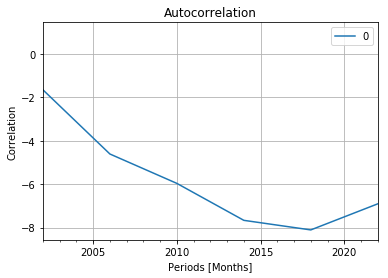

In [299]:
# # Analysis of harmonics
# 
# The idea behind this script is to explore the data series for seasonal trends, using a 
# fourier decomposition of the time series, aggregated by climatic seasons (resampled and sliced 
# every 3 months).
# 
# The analysis goes as follows:
# 
# - Loading the data
# - Filling the gaps
# - Resampling at different scales (3 months, 6 months, 1 and 4 years)
# - Slicing the data by seasons
# - Applying the Fourier transform over each of the seasonal data
# - Filtering out minor frequencies (below 500 in the power spectrum)
# - Recomposing the original series only with the major frequency
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

from numpy.fft import fft, ifft

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

# Import data
global_temp = train

# Fill the gaps in the series


# Skip the first years and start the series at the beginning of spring,
# so seasonal variations can be captured
#global_temp = global_temp['1753-03-21':]
train_df = pd.DataFrame(train)
# Seasonal
seasonal_temp = timeseries.resample('3M', how='mean')
#plt.subplot(4,1,1)
seasonal_temp.plot()
#plt.ylim()



#half year
bi_seasonal = timeseries.resample('6M', how='mean')
#plt.subplot(4,1,2)
bi_seasonal.plot()

#Yearly
year = timeseries.resample('A', how='mean')

year.plot()


# 4-Yearly
year_4 = timeseries.resample('4A', how='mean')

year_4.plot()


fullseries = np.array(timeseries)

# detrend the seasonal data by removing the average
avg_series = fullseries - np.average(fullseries)


# Get correlogram for 24 seasons (2 years)
seasonal_correlogram = [1.0, ]
seasonal_correlogram.extend([np.corrcoef(avg_series[:-i], avg_series[i:])[0, 1] for i in range(1, 25)])

plt.plot(seasonal_correlogram)
plt.grid()
plt.xlabel('Periods [Months]')
plt.ylabel('Correlation')
plt.title('Autocorrelation')
plt.show()


In [376]:
import statsmodels.api as sm

model = sm.OLS(train, month_dummies_train).fit()
model.summary()


### No real seasonality detected here assuming the simulated series has a 12 month cycle 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.064
Method:                 Least Squares   F-statistic:                    0.1007
Date:                Mon, 29 Apr 2019   Prob (F-statistic):               1.00
Time:                        14:58:53   Log-Likelihood:                -593.84
No. Observations:                 180   AIC:                             1212.
Df Residuals:                     168   BIC:                             1250.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
('months',)_Apr    -1.1891      6.785     -0.175      0.861     -14.583      12.205
('months',)_Aug    -2.6898      6.785     -0.396      0.692     -16.084      10.705
('months',)_Dec    -3.7607      6.785     -0.554      0.580     -17.155       9.634
('months',)_Feb    -0.4180      6.785     -0.062      0.951     -13.812      12.976
('months',)_Jan    -0.4914      6.785     -0.072      0.942     -13.886      12.903
('months',)_Jul    -2.0325      6.785     -0.300      0.765     -15.427      11.362
('months',)_Jun    -2.5334      6.785     -0.373      0.709     -15.928      10.861
('months',)_Mar    -0.9787      6.785     -0.144      0.885     -14.373      12.416
('months',)_May    -2.8937      6.785     -0.427      0.670     -16.288      10.501
('months',)_Nov    -2.6869      6.785     -0.396      0.693     -16.081      10.708
('months',)_Oct    -0.9967      6.785     -0.147      0.883     -14.391      12.398
('months',)_Sep    -2.0759      6.785     -0.306      0.760     -15.470      11.319
==============================================================================
Omnibus:                       19.107   Durbin-Watson:                   0.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.758
Skew:                           0.801   Prob(JB):                     1.88e-05
Kurtosis:                       3.580   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [363]:
import statsmodels.api as sm
from sklearn import linear_model
#from regressors import stats
ols = linear_model.LinearRegression()
ols.fit(month_dummies_train, train)
# and covariance estimates
print("coef_pval:\n", stats.coef_pval(ols, month_dummies_train, train))

AttributeError: module 'scipy.stats' has no attribute 'coef_pval'

In [ ]:
# # Analysis of harmonics
# 
# The idea behind this script is to explore the data series for seasonal trends, using a 
# fourier decomposition of the time series, aggregated by climatic seasons (resampled and sliced 
# every 3 months).
# 
# The analysis goes as follows:
# 
# - Loading the data
# - Filling the gaps
# - Resampling at different scales (3 months, 6 months, 1 and 4 years)
# - Slicing the data by seasons
# - Applying the Fourier transform over each of the seasonal data
# - Filtering out minor frequencies (below 500 in the power spectrum)
# - Recomposing the original series only with the major frequency
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

from numpy.fft import fft, ifft

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

# Import data
global_temp = train

# Fill the gaps in the series
global_temp.fillna(method='ffill')

# Skip the first years and start the series at the beginning of spring,
# so seasonal variations can be captured
#global_temp = global_temp['1753-03-21':]

# Seasonal
seasonal_temp = global_temp.resample('3M', how='mean')
plt.subplot(4,1,1)
seasonal_temp['LandAverageTemperature'].plot()
plt.ylim([0,18])
plt.grid()

# half year
bi_seasonal_temp = global_temp.resample('6M', how='mean')
plt.subplot(4,1,2)
bi_seasonal_temp['LandAverageTemperature'].plot()
plt.ylim([0,18])
plt.grid()

# Yearly
year_temp = global_temp.resample('A', how='mean')
plt.subplot(4,1,3)
year_temp['LandAverageTemperature'].plot()
plt.ylim([0,18])
plt.grid()

# 4-Yearly
year_4_temp = global_temp.resample('4A', how='mean')
plt.subplot(4,1,4)
year_4_temp['LandAverageTemperature'].plot()
plt.ylim([0,18])
plt.grid()
plt.show()
# # Explore autocorrelation of the time series (at motnhly scale)
## eplore the autocorrelation of temperature data
lat = np.array(global_temp['LandAverageTemperature'])

# detrend the seasonal data by removing the average
det_lat = lat - np.average(lat)

# Get correlogram for 24 seasons (2 years)
seasonal_correlogram = [1.0, ]
seasonal_correlogram.extend([np.corrcoef(det_lat[:-i], det_lat[i:])[0, 1] for i in range(1, 25)])

plt.plot(seasonal_correlogram)
plt.grid()
plt.xlabel('Periods [Months]')
plt.ylabel('Correlation')
plt.title('Autocorrelation')
plt.show()

## Therefore cold winters are followed by hot summers, or hot summer followed by cold winters
# # Slicing data into seasons
# Analysing seasonal changes over time
seasonal_lat = np.array(seasonal_temp['LandAverageTemperature'])

# Parse into stations
spring = seasonal_lat[::4]
summer = seasonal_lat[1::4]
fall = seasonal_lat[2::4]
winter = seasonal_lat[3::4]


plt.figure(figsize=(12,3))
ax = plt.subplot(1,1,1)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])

plt.plot(spring, label='Spring')
plt.plot(summer, label='Summer')
plt.plot(fall, label='Fall')
plt.plot(winter, label='Winter')

plt.xlim([0, len(summer)])
plt.grid()
plt.xlabel('Year')
plt.ylabel('Average Temperature [C]')

plt.legend(bbox_to_anchor=(1.18, 1.04))
# # Preparing data for trend analysis over each season
# 
# The data is detrended using a mean filter (basically removing the mean value for each of the series), 
# to later apply a fft transform of the detrended data.
# Seasonal analysis
seasons = [spring, summer, fall, winter]
seasons_string = ['spring', 'summer', 'fall', 'winter']

# Detrend for each of the seasons
seasons_average = [np.average(season) for season in seasons]
seasons_det = [seasons[i] - seasons_average[i] for i in range(len(seasons))]

plt.figure(figsize=[12,6])
plt.subplot(2,1,1)
[plt.plot(seasons_det[i], label=seasons_string[i]) for i in range(len(seasons))]
plt.ylabel('Centered Temperature')
plt.grid()
plt.xlim([0, len(seasons_det[0])])


## do the regression analysis
# Get the fourier coefficients
seasons_fft = [fft(season) for season in seasons_det]

# Get the power spectrum
seasons_ps = [np.abs(season)**2 for season in seasons_fft]

plt.subplot(2,1,2)
[plt.plot(seasons_ps[i], label=seasons_string[i]) for i in range(len(seasons))]
plt.xlabel('Frequency [Months]')
plt.ylabel('Power spectrum')
plt.xlim([0, 30])
plt.grid()
plt.show()
# # Filter frequencies in the low part of the power spectrum and re-construct the series
# 
# A filter in the value of 500 of the power spectrum was set. In other words, if the value 
# of the power spectrum is below this threshold, it will be set to 0. this will allow to focus 
# on the signal of the data, instead that in the fluctuations that comes from the randomness of 
# the process and the measurements.
# 
# The selection of the 500 threshold was arbitrary and of course is open for debate.
## Clean each of the time series in the seasons by selecting such that the power spectrum is higher than 500
clean_seasons_ps = seasons_ps[:]
clean_seasons_ps = [[seasons_fft[season_i][year_i] if seasons_ps[season_i][year_i] > 500 else 0 
                     for year_i in range(len(seasons_fft[0]))] for season_i in range(len(seasons_ps))]

plt.figure(figsize=[12,9])
plt.subplot(3,1,1)
plt.plot(np.transpose(clean_seasons_ps))
plt.xlim([0, 30])
plt.grid()

## redraw the series only with significant harmonics
seasons_series_clean = [np.real(ifft(serie)) for serie in clean_seasons_ps]

plt.subplot(3,1,2)
[plt.plot(seasons_series_clean[i], label=seasons_string[i]) for i in range(len(seasons))]
plt.xlim([0, len(seasons_det[0])])
plt.legend(bbox_to_anchor=(1.18, 1.04))
plt.grid()

## put the trend back into the dataset
seasonal_trends = [seasons_series_clean[i] + seasons_average[i] for i in range(len(seasons))]

plt.subplot(3,1,3)
[plt.plot(seasonal_trends[i], label=seasons_string[i]) for i in range(len(seasons))]
plt.xlim([0, len(seasons_det[0])])
plt.legend(bbox_to_anchor=(1.18, 1.04))
plt.grid()
plt.show()
# # Results and conclusions
# 
# From the analysiis it can be seen that indeed there seems to be a trend  in the 
# last 150 years (from year 100 and forth) to increment the average temperature in 
# each season.
# 
# Seems that the average temperature in spring is more variable thatn the rest of the 
# seasons, however one of the main harmonics of the series seem to reveal that the 
# large temperature fluctations in the winter are consistent with the main variations
# of temperature in the winter. This appear to occur in a 25-30 years cycles at the 
# beggining of the series, and in 18-20 years cycles at the end of the series 
# (industrialisation perhaps?).
# 
# On the contrary, oscilations in the fall are far more stable, indicating more stable
# patterns. Therefore, we migh think on using average fall temperature as an indicator 
# of the Land Average Temperature (LAM), in the detection of long term variations of temperature.
# 
# Also is interesting to see how the trends between winter and summer have appear to change
# in the latter 150 years. In the first period, summer and winter appear to have similar
# trends, as cold winters lead to cold summers, however this trend seem to change in the 
# second period, especially towards the end, in which an inversion is found, for which cold winters 
# seem to be paired up with warm summers. Looks like the weather may be changing indeed.

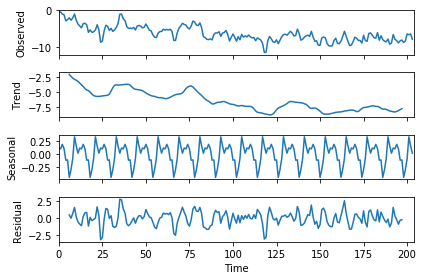

In [212]:

from random import randrange
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
#series = [i+randrange(10) for i in range(1,100)]
result = seasonal_decompose(series, model='additive', freq=12)
result.plot()
pyplot.show()

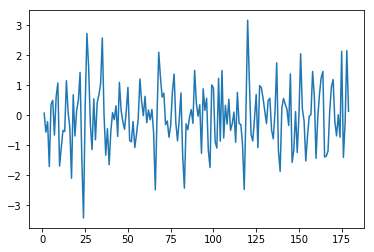

In [213]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot

def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

train_series = pd.Series(train)
test_series = pd.Series(test)

diff1 = train_series.diff()

diff1 = np.array(diff1)

diff1_series = pd.Series(diff1[1:len(diff1)])
diff2 = diff1_series.diff()
diff2 = np.array(diff2)
###########################

diff1_test = test_series.diff()

### Plot First Difference
pyplot.plot(diff1)
pyplot.show()

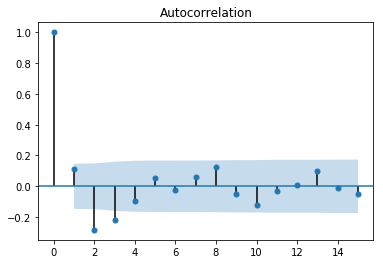

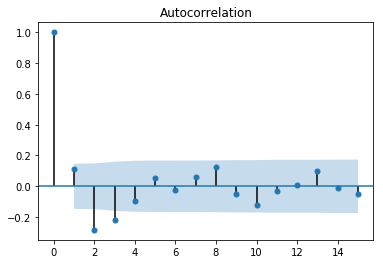

In [214]:
from statsmodels.graphics.tsaplots import plot_acf

#Differencing might have induced negative autocorrelation here . 
#1st difference might not be appropriate 

plot_acf(diff1[1:len(diff1)].reshape(1,len(diff1)-1)[0], lags=15)

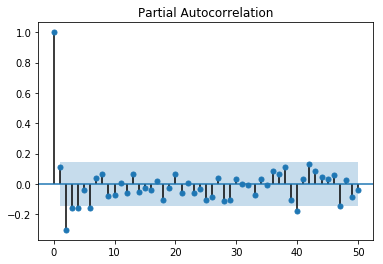

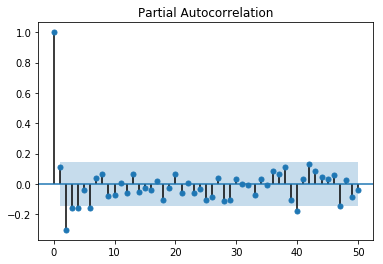

In [215]:
# More of a gradual decay ... some evidence for seasonality visible but not
# as strong. 

from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(diff1[1:len(diff1)].reshape(1,len(diff1)-1)[0], lags=50)

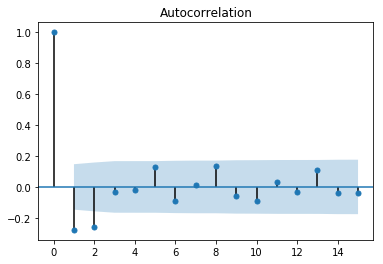

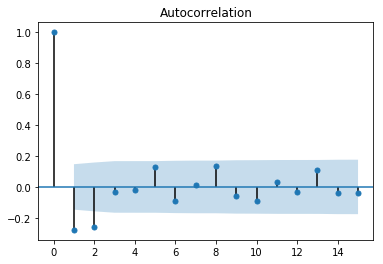

In [216]:
from statsmodels.graphics.tsaplots import plot_acf
#2nd differencing doesn't really help. 

##Given the seasonal pattern also identified in the decomposition, seasonal differencing might be more appropriate 
##for this series 
#Differencing might have induced negative autocorrelation here . 
#1st difference might not be appropriate 

plot_acf(diff2[1:len(diff2)].reshape(1,len(diff2)-1)[0], lags=15)

In [217]:
# Series is definitely more stationary ... go with the 1st difference. 



dftest = adfuller(diff1[1:len(diff1)].reshape(1,len(diff1)-1)[0], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Test Statistic                -7.929425e+00
p-value                        3.545865e-12
#Lags Used                     5.000000e+00
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64


In [218]:
#Choosing MA(3) model due to geometric decay on the PACF and 3 significant spikes on the ACF

# fit model
model = ARIMA(train, order=(3,0,0))
model_fit = model.fit()
print(model_fit.summary())
# plot residual errors


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  180
Model:                     ARMA(3, 0)   Log Likelihood                -249.483
Method:                       css-mle   S.D. of innovations              0.962
Date:                Mon, 29 Apr 2019   AIC                            508.965
Time:                        13:12:58   BIC                            524.930
Sample:                             0   HQIC                           515.438
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.9371      0.771     -7.697      0.000      -7.449      -4.425
ar.L1.y        1.1010      0.072     15.285      0.000       0.960       1.242
ar.L2.y       -0.4380      0.105     -4.175      0.0

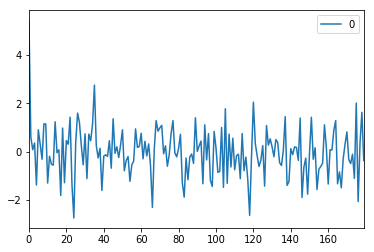

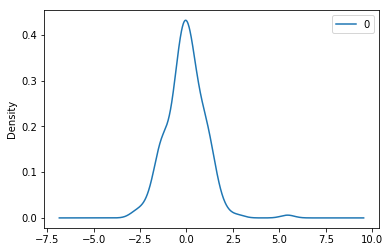

                0
count  180.000000
mean    -0.029086
std      1.033353
min     -2.749049
25%     -0.592542
50%     -0.068197
75%      0.534969
max      5.445705


In [219]:
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

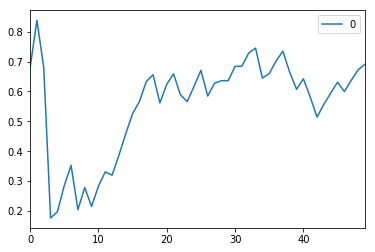

In [220]:
from statsmodels.stats.diagnostic import acorr_ljungbox

#Null hypothesis of ljung box -- reject if residuals don't have autocorrelation

box_p_values = acorr_ljungbox(residuals, lags = 50)[1]
box_p_values = pd.DataFrame(box_p_values)
box_p_values.plot()

## Values all above 0.05, can't reject

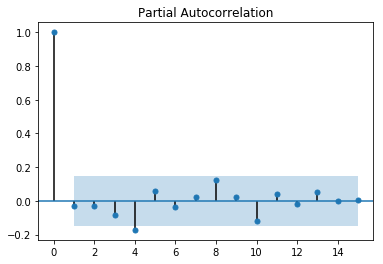

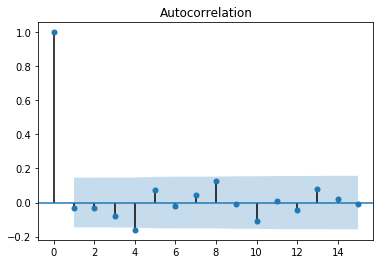

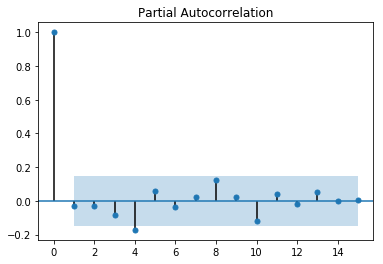

In [221]:
#Residuals are white noise 
plot_acf(residuals, lags=15)
plot_pacf(residuals, lags=15)

predicted=-6.695027, expected=-6.874496
predicted=-6.952537, expected=-7.503437
predicted=-7.322214, expected=-7.653295
predicted=-7.378819, expected=-6.107945
predicted=-5.755968, expected=-8.196091
predicted=-8.753913, expected=-6.987137
predicted=-6.222402, expected=-8.051298
predicted=-8.275465, expected=-8.440290
predicted=-8.052074, expected=-8.664664
predicted=-8.382883, expected=-7.876428
predicted=-7.551045, expected=-9.318617
predicted=-9.401545, expected=-8.975536
predicted=-8.377913, expected=-6.650225
predicted=-6.349543, expected=-7.948668
predicted=-8.453546, expected=-8.307925
predicted=-7.868254, expected=-8.919777
predicted=-8.671446, expected=-8.379011
predicted=-7.985615, expected=-8.149461
predicted=-8.061372, expected=-8.820938
predicted=-8.720323, expected=-8.405449
predicted=-8.017856, expected=-6.469422
predicted=-6.295787, expected=-6.698360
predicted=-7.099485, expected=-6.481625
predicted=-6.373672, expected=-7.969175
Test MSE: 1.308


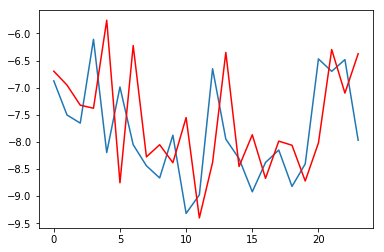

In [379]:
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

#######This is a one period ahead forecast 

#### Limitation will be that it could be flat for more than one period ahead. 


history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(3,0,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
    #### Data is added after each iteration and model updated 
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

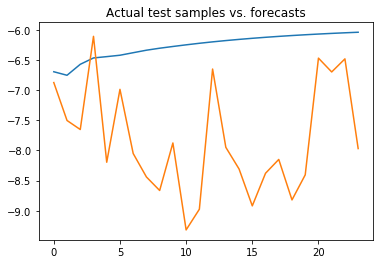

Test MSE: 3.328


In [381]:
##This model actually flattens out, misspeccified 

x = np.arange(test.shape[0])
#plt.scatter(x, test, marker='x')
##Orange is true series
model = ARIMA(train, order=(3,0,0))
model_fit = model.fit(disp=False)

plt.plot(x, model_fit.forecast(steps=test.shape[0])[0])
plt.plot(test)
plt.title('Actual test samples vs. forecasts')
plt.show()

error = mean_squared_error(test, model_fit.forecast(steps=test.shape[0])[0])
print('Test MSE: %.3f' % error)

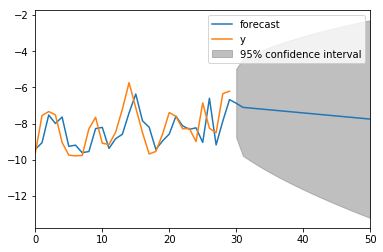

In [383]:

from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
a = 0.05

model = ARIMA(train, order=(0,1,2))
model_fit = model.fit(disp=False)
model_fit.plot_predict(len(train)-30, len(train)+20, alpha = a)
pyplot.show()

In [480]:
from pmdarima.arima import auto_arima

# m = number of observations per seasonal cycle. setting m =12 for monthly data.
#

#auto-ARIMA , assuming first difference 
stepwise_model_seasonal = auto_arima(train, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model_seasonal.aic())

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=522.142, BIC=537.732, Fit time=1.015 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=603.127, BIC=609.363, Fit time=0.023 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=561.065, BIC=573.537, Fit time=0.245 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=525.117, BIC=537.589, Fit time=0.325 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=523.829, BIC=542.537, Fit time=1.067 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=593.907, BIC=606.379, Fit time=0.263 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=523.766, BIC=542.474, Fit time=1.807 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=525.624, BIC=547.450, Fit time=3.247 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=506.057, BIC=524.765, Fit time=1.052 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 

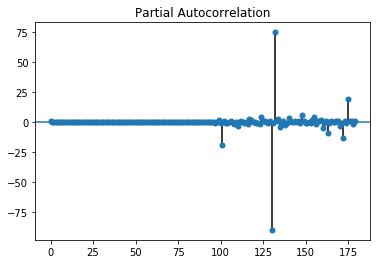

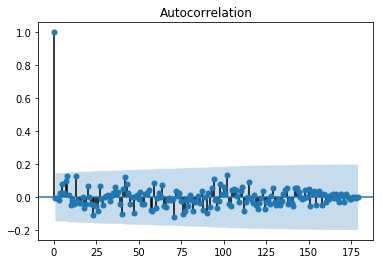

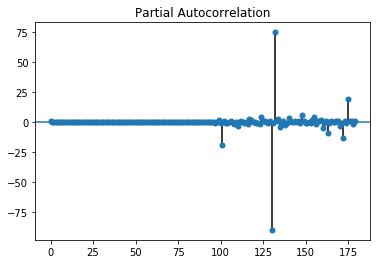

In [482]:
plot_acf(stepwise_model_seasonal.resid())

plot_pacf(stepwise_model_seasonal.resid())

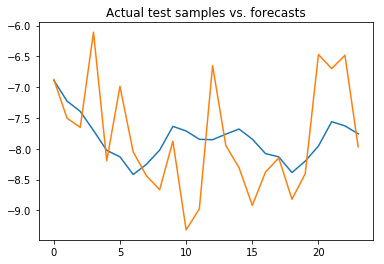

Test Score: 0.82 RMSE
Test MSE: 0.675


In [484]:
stepwise_model_seasonal_fit = stepwise_model_seasonal.fit(train)
predictions = stepwise_model_seasonal_fit.predict(n_periods=test.shape[0])

x = np.arange(test.shape[0])
#plt.scatter(x, test, marker='x')
##Orange is true series

plt.plot(x, predictions)
plt.plot(test)
plt.title('Actual test samples vs. forecasts')
plt.show()

testScore = math.sqrt(mean_squared_error(test, predictions))
print('Test Score: %.2f RMSE' % (testScore))

error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

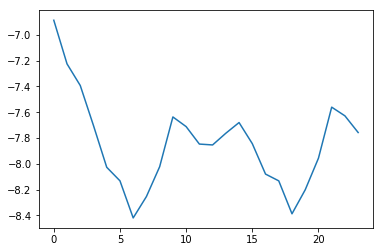

In [394]:
#pyplot.plot(test)
pyplot.plot(predictions)
#pyplot.plot(predictions, color='red')
#pyplot.show()

In [436]:
from pmdarima.arima import auto_arima

# m = number of observations per seasonal cycle. setting m =12 for monthly data.
#

#auto-ARIMA , assuming first difference 
stepwise_model_noseasonal = auto_arima(train, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=False,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model_noseasonal.aic())

Fit ARIMA: order=(1, 1, 1); AIC=518.156, BIC=530.905, Fit time=0.125 seconds
Fit ARIMA: order=(0, 1, 0); AIC=523.531, BIC=529.906, Fit time=0.002 seconds
Fit ARIMA: order=(1, 1, 0); AIC=523.261, BIC=532.823, Fit time=0.017 seconds
Fit ARIMA: order=(0, 1, 1); AIC=520.914, BIC=530.476, Fit time=0.021 seconds
Fit ARIMA: order=(2, 1, 1); AIC=499.304, BIC=515.240, Fit time=0.139 seconds
Fit ARIMA: order=(2, 1, 0); AIC=508.156, BIC=520.906, Fit time=0.031 seconds
Fit ARIMA: order=(2, 1, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 1, 2); AIC=501.662, BIC=523.974, Fit time=0.271 seconds
Fit ARIMA: order=(3, 1, 1); AIC=496.621, BIC=515.745, Fit time=0.400 seconds
Fit ARIMA: order=(3, 1, 0); AIC=505.602, BIC=521.539, Fit time=0.059 seconds
Total fit time: 1.087 seconds
496.6208565065119


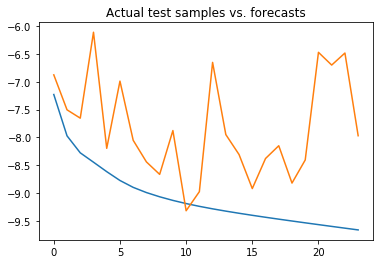

Test MSE: 2.417


In [441]:
#The non-seasonal model missing the mark.  much higher MSE
stepwise_model_noseason_fit = stepwise_model_noseasonal.fit(train)
predictions = stepwise_model_noseason_fit.predict(n_periods=test.shape[0])

x = np.arange(test.shape[0])
#plt.scatter(x, test, marker='x')
##Orange is true series

plt.plot(x, predictions)
plt.plot(test)
plt.title('Actual test samples vs. forecasts')
plt.show()

error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

In [462]:
X2 = X.reshape(-1,2)

X2.shape

(102, 2)

Epoch 1/1
 - 7s - loss: 0.1167
Epoch 1/1
 - 2s - loss: 0.0252
Epoch 1/1
 - 2s - loss: 0.0240
Epoch 1/1
 - 2s - loss: 0.0230
Epoch 1/1
 - 2s - loss: 0.0222
Epoch 1/1
 - 2s - loss: 0.0214
Epoch 1/1
 - 2s - loss: 0.0208
Epoch 1/1
 - 2s - loss: 0.0203
Epoch 1/1
 - 2s - loss: 0.0199
Epoch 1/1
 - 2s - loss: 0.0195
Epoch 1/1
 - 2s - loss: 0.0191
Epoch 1/1
 - 2s - loss: 0.0188
Epoch 1/1
 - 2s - loss: 0.0186
Epoch 1/1
 - 2s - loss: 0.0183
Epoch 1/1
 - 2s - loss: 0.0180
Epoch 1/1
 - 2s - loss: 0.0178
Epoch 1/1
 - 2s - loss: 0.0176
Epoch 1/1
 - 2s - loss: 0.0174
Epoch 1/1
 - 2s - loss: 0.0172
Epoch 1/1
 - 2s - loss: 0.0170
Epoch 1/1
 - 2s - loss: 0.0168
Epoch 1/1
 - 2s - loss: 0.0167
Epoch 1/1
 - 2s - loss: 0.0165
Epoch 1/1
 - 2s - loss: 0.0163
Epoch 1/1
 - 2s - loss: 0.0162
Epoch 1/1
 - 2s - loss: 0.0161
Epoch 1/1
 - 2s - loss: 0.0159
Epoch 1/1
 - 2s - loss: 0.0158
Epoch 1/1
 - 2s - loss: 0.0157
Epoch 1/1
 - 2s - loss: 0.0155
Epoch 1/1
 - 2s - loss: 0.0154
Epoch 1/1
 - 2s - loss: 0.0152
Epoch 1/

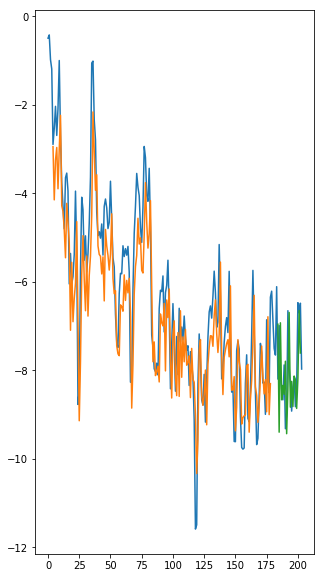

In [509]:
from pylab import rcParams
rcParams['figure.figsize'] = 5, 10

# Stacked LSTM for international airline passengers problem with memory
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix

dataset = X

X2 = X.reshape(-1, 1)

dataset = X2
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.885)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 4
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(150):
	model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
	model.reset_states()
# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


### Look back 4 1.09 

### 8 LSTM cells , 1.14 RMSE

In [536]:
"""Code for utility tools."""
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np
from numpy.lib.stride_tricks import as_strided
from sklearn.utils import check_array


def segmentation(ts_size, window_size, overlapping, n_segments=None):
    """Compute the indices for Piecewise Agrgegate Approximation.

    Parameters
    ----------
    ts_size : int
        The size of the time series.

    window_size : int
        The size of the window.

    overlapping : bool
        If True, overlapping windows may be used. If False, non-overlapping
        are used.

    n_segments : int or None (default = None)
        The number of windows. If None, the number is automatically
        computed using ``window_size``.

    Returns
    -------
    start : array
        The lower bound for each window.

    end : array
        The upper bound for each window.

    size : int
        The size of ``start``.

    """
    if not isinstance(ts_size, (int, np.integer)):
        raise TypeError("'ts_size' must be an integer.")
    if not ts_size >= 2:
        raise ValueError("'ts_size' must be an integer greater than or equal "
                         "to 2 (got {0}).".format(ts_size))
    if not isinstance(window_size, (int, np.integer)):
        raise TypeError("'window_size' must be an integer.")
    if not window_size >= 1:
        raise ValueError("'window_size' must be an integer greater than or "
                         "equal to 1 (got {0}).".format(window_size))
    if not window_size <= ts_size:
        raise ValueError("'window_size' must be lower than or equal to "
                         "'ts_size' ({0} > {1}).".format(window_size, ts_size))
    if not (n_segments is None or isinstance(n_segments, (int, np.integer))):
        raise TypeError("'n_segments' must be None or an integer.")
    if isinstance(n_segments, (int, np.integer)):
        if not 2 <= n_segments <= ts_size:
            raise ValueError(
                "If 'n_segments' is an integer, it must be greater than or "
                "equal to 2 and lower than or equal to 'ts_size' "
                "({0} > {1}).".format(n_segments, ts_size)
            )

    if n_segments is None:
        quotient, remainder = divmod(ts_size, window_size)
        n_segments = quotient if remainder == 0 else quotient + 1

    if not overlapping:
        bounds = np.linspace(0, ts_size, n_segments + 1).astype('int64')
        start = bounds[:-1]
        end = bounds[1:]
        size = start.size
        return start, end, size
    else:
        n_overlapping = (n_segments * window_size) - ts_size
        n_overlaps = n_segments - 1
        overlaps = np.linspace(0, n_overlapping,
                               n_overlaps + 1).astype('int64')
        bounds = np.arange(0, (n_segments + 1) * window_size, window_size)
        start = bounds[:-1] - overlaps
        end = bounds[1:] - overlaps
        size = start.size
        return start, end, size


def windowed_view(X, window_size, window_step=1):
    """Return a windowed view of a 2D array.

    Parameters
    ----------
    X : array-like, shape = (n_samples, n_timestamps)
        Input data.

    window_size : int
        The size of the window. It must be between 1 and ``n_timestamps``.

    window_step : int (default = 1)
        The step of the sliding window

    Returns
    -------
    X_new : array, shape = (n_samples, n_windows, window_size)
        Windowed view of the input data. ``n_windows`` is computed as
        ``(n_timestamps - window_size + window_step) // window_step``.

    """
    X = check_array(X, dtype=None)
    n_samples, n_timestamps = X.shape

    if not isinstance(window_size, (int, np.integer)):
        raise TypeError("'window_size' must be an integer.")
    if not 1 <= window_size <= n_timestamps:
        raise ValueError("'window_size' must be an integer between 1 and "
                         "n_timestamps.")
    if not isinstance(window_step, (int, np.integer)):
        raise TypeError("'window_step' must be an integer.")
    if not 1 <= window_step <= n_timestamps:
        raise ValueError("'window_step' must be an integer between 1 and "
                         "n_timestamps.")

    overlap = window_size - window_step
    shape_new = (n_samples,
                 (n_timestamps - overlap) // window_step,
                 window_size)
    s0, s1 = X.strides
    strides_new = (s0, window_step * s1, s1)
    return as_strided(X, shape=shape_new, strides=strides_new)

In [537]:
"""Code for scalers."""

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler as SklearnStandardScaler
from sklearn.preprocessing import MinMaxScaler as SklearnMinMaxScaler
from sklearn.preprocessing import MaxAbsScaler as SklearnMaxAbsScaler
from sklearn.preprocessing import RobustScaler as SklearnRobustScaler
from sklearn.utils.validation import check_array


class StandardScaler(BaseEstimator, TransformerMixin):
    """Standardize time series by removing mean and scaling to unit variance.

    Parameters
    ----------
    with_mean : bool (default = True)
        If True, center the data before scaling.

    with_std : bool (default = True)
        If True, scale the data to unit variance.

    """

    def __init__(self, with_mean=True, with_std=True):
        self.with_mean = with_mean
        self.with_std = with_std

    def fit(self, X=None, y=None):
        """Pass.

        Parameters
        ----------
        X
            Ignored

        y
            Ignored

        Returns
        -------
        self : object

        """
        return self

    def transform(self, X):
        """Perform standardization by centering and scaling.

        Parameters
        ----------
        X : array-like, shape = (n_samples, n_timestamps)
            Data to scale.

        Returns
        -------
        X_new : array-like, shape = (n_samples, n_timestamps)
            Scaled data.

        """
        X = check_array(X, dtype='float64')
        scaler = SklearnStandardScaler(
            with_mean=self.with_mean, with_std=self.with_std)
        X_new = scaler.fit_transform(X.T).T
        return X_new


class MinMaxScaler(BaseEstimator, TransformerMixin):
    """Transforms samples by scaling each sample to a given range.

    Parameters
    ----------
    sample_range : tuple (min, max) (default = (0, 1))
        Desired range of transformed data.

    """

    def __init__(self, sample_range=(0, 1)):
        self.sample_range = sample_range

    def fit(self, X=None, y=None):
        """Pass.

        Parameters
        ----------
        X
            Ignored

        y
            Ignored

        Returns
        -------
        self : object

        """
        return self

    def transform(self, X):
        """Scale samples of X according to sample_range.

        Parameters
        ----------
        X : array-like, shape = (n_samples, n_timestamps)
            Data to scale.

        Returns
        -------
        X_new : array-like, shape = (n_samples, n_timestamps)
            Scaled data.

        """
        X = check_array(X, dtype='float64')
        scaler = SklearnMinMaxScaler(feature_range=self.sample_range)
        X_new = scaler.fit_transform(X.T).T
        return X_new


class MaxAbsScaler(BaseEstimator, TransformerMixin):
    """Scale each sample by its maximum absolute value."""

    def __init__(self):
        pass

    def fit(self, X=None, y=None):
        """Pass.

        Parameters
        ----------
        X
            Ignored

        y
            Ignored

        Returns
        -------
        self : object

        """
        return self

    def transform(self, X):
        """Scale the data.

        Parameters
        ----------
        X : array-like, shape = (n_samples, n_timestamps)
            Data to scale.

        Returns
        -------
        X_new : array-like, shape = (n_samples, n_timestamps)
            Scaled data.

        """
        X = check_array(X, dtype='float64')
        scaler = SklearnMaxAbsScaler()
        X_new = scaler.fit_transform(X.T).T
        return X_new


class RobustScaler(BaseEstimator, TransformerMixin):
    """Scale samples using statistics that are robust to outliers.

    This Scaler removes the median and scales the data according to
    the quantile range (defaults to IQR: Interquartile Range).
    The IQR is the range between the 1st quartile (25th quantile)
    and the 3rd quartile (75th quantile).

    Centering and scaling happen independently on each sample by
    computing the relevant statistics on the timestamps. Median and
    interquartile range are used to transform the data.

    Standardization of a dataset is a common requirement for many
    machine learning estimators. Typically this is done by removing the mean
    and scaling to unit variance. However, outliers can often influence the
    sample mean / variance in a negative way. In such cases, the median and
    the interquartile range often give better results.

    Parameters
    ----------
    with_centering : bool (default = True)
        If True, center the data before scaling.

    with_scaling : bool (default = True)
        If True, scale the data to interquartile range.

    quantile_range : tuple (q_min, q_max), 0.0 < q_min < q_max < 100.0
        Default: (25.0, 75.0) = (1st quantile, 3rd quantile) = IQR

    """

    def __init__(self, with_centering=True, with_scaling=True,
                 quantile_range=(25.0, 75.0)):
        self.with_centering = with_centering
        self.with_scaling = with_scaling
        self.quantile_range = quantile_range

    def fit(self, X=None, y=None):
        """Pass.

        Parameters
        ----------
        X
            Ignored

        y
            Ignored

        Returns
        -------
        self : object

        """
        return self

    def transform(self, X):
        """Scale the data.

        Parameters
        ----------
        X : array-like, shape = (n_samples, n_timestamps)
            Data to scale.

        Returns
        -------
        X_new : array-like, shape = (n_samples, n_timestamps)
            Scaled data.

        """
        X = check_array(X, dtype='float64')
        scaler = SklearnRobustScaler(
            with_centering=self.with_centering,
            with_scaling=self.with_scaling,
            quantile_range=self.quantile_range
        )
        X_new = scaler.fit_transform(X.T).T
        return X_new

In [538]:
"""Code for Piecewise Aggregate Approximation."""

import numpy as np
from math import ceil
from numba import njit, prange
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array
#from ..utils import segmentation


@njit(parallel=True)
def _paa(X, n_samples, n_timestamps, start, end, n_timestamps_new):
    X_paa = np.empty((n_samples, n_timestamps_new))
    for i in prange(n_samples):
        for j in prange(n_timestamps_new):
            X_paa[i, j] = np.mean(X[i, start[j]:end[j]])
    return X_paa


class PiecewiseAggregateApproximation(BaseEstimator, TransformerMixin):
    """Piecewise Aggregate Approximation.

    Parameters
    ----------
    window_size : int, float or None (default = 1.)
        Length of the sliding window. If float, it represents
        a percentage of the size of each time series and must be
        between 0 and 1.

    output_size : int, float or None (default = None)
        Size of the returned time series. If float, it represents
        a percentage of the size of each time series and must be
        between 0. and 1. Ignored if ``window_size`` is not None.
        It can't be None if ``window_size`` is None. If you want to use
        ``output_size`` over ``window_size``, you must set
        ``window_size=None``.

    overlapping : bool (default = True)
        When ``window_size=None``, ``output_size`` is used to derive the window
        size; the window size is fixed if ``overlapping=True`` and may vary
        if ``overlapping=False``. Ignored if ``window_size`` is specified.

    References
    ----------
    .. [1] E. Keogh, K. Chakrabarti, M. Pazzani, and S. Mehrotra,
           "Dimensionality reduction for fast similarity search in large
           time series databases". Knowledge and information Systems,
           3(3), 263-286 (2001).

    """

    def __init__(self, window_size=1., output_size=None, overlapping=True):
        self.window_size = window_size
        self.output_size = output_size
        self.overlapping = overlapping

    def fit(self, X=None, y=None):
        """Pass.

        Parameters
        ----------
        X
            Ignored
        y
            Ignored

        Returns
        -------
        self
            object

        """
        return self

    def transform(self, X):
        """Reduce the dimensionality of each time series.

        Parameters
        ----------
        X : array-like, shape = (n_samples, n_timestamps)

        Returns
        -------
        X_new : array, shape = (n_samples, n_timestamps_new)

        """
        X = check_array(X)
        n_samples, n_timestamps = X.shape

        window_size, output_size = self._check_params(n_timestamps)
        if window_size == 1:
            return X
        else:
            start, end, n_timestamps_new = segmentation(
                n_timestamps, window_size, self.overlapping, output_size
            )
            X_paa = _paa(X, n_samples, n_timestamps,
                         start, end, n_timestamps_new)
            return X_paa

    def _check_params(self, n_timestamps):
        if (self.window_size is None and self.output_size is None):
            raise TypeError("'window_size' and 'output_size' cannot be "
                            "both None.")
        if self.window_size is not None:
            if not isinstance(self.window_size,
                              (int, np.integer, float, np.floating)):
                raise TypeError("If specified, 'window_size' must be an "
                                "integer or a float.")
            if isinstance(self.window_size, (int, np.integer)):
                if not 1 <= self.window_size <= n_timestamps:
                    raise ValueError(
                        "If 'window_size' is an integer, it must be greater "
                        "than or equal to 1 and lower than or equal to the "
                        "size of each time series (i.e. the size of the last "
                        "dimension of X) (got {0}).".format(self.window_size)
                    )
                window_size = self.window_size
            else:
                if not 0 < self.window_size <= 1:
                    raise ValueError(
                        "If 'window_size' is a float, it must be greater "
                        "than 0 and lower than or equal to 1 "
                        "(got {0}).".format(self.window_size)
                    )
                window_size = ceil(self.window_size * n_timestamps)
            output_size = None
        else:
            if not isinstance(self.output_size,
                              (int, np.integer, float, np.floating)):
                raise TypeError("If specified, 'output_size' must be an "
                                "integer or a float.")
            if isinstance(self.output_size, (int, np.integer)):
                if not 1 <= self.output_size <= n_timestamps:
                    raise ValueError(
                        "If 'output_size' is an integer, it must be greater "
                        "than or equal to 1 and lower than or equal to the "
                        "size of each time series (i.e. the size of the last "
                        "dimension of X) (got {0}).".format(self.output_size)
                    )
                output_size = self.output_size
            else:
                if not 0 < self.output_size <= 1.:
                    raise ValueError(
                        "If 'output_size' is a float, it must be greater "
                        "than 0 and lower than or equal to 1 "
                        "(got {0}).".format(self.output_size)
                    )
                output_size = ceil(self.output_size * n_timestamps)
            window_size, remainder = divmod(n_timestamps, output_size)
            if remainder != 0:
                window_size += 1
        return window_size, output_size

In [539]:

import numpy as np
from math import ceil
from numba import njit, prange
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array
#from ..approximation import PiecewiseAggregateApproximation
#from ..preprocessing import MinMaxScaler


@njit()
def _gasf(X_cos, X_sin, n_samples, image_size):
    X_gasf = np.empty((n_samples, image_size, image_size))
    for i in prange(n_samples):
        X_gasf[i] = np.outer(X_cos[i], X_cos[i]) - np.outer(X_sin[i], X_sin[i])
    return X_gasf


@njit()
def _gadf(X_cos, X_sin, n_samples, image_size):
    X_gadf = np.empty((n_samples, image_size, image_size))
    for i in prange(n_samples):
        X_gadf[i] = np.outer(X_sin[i], X_cos[i]) - np.outer(X_cos[i], X_sin[i])
    return X_gadf


class GramianAngularField(BaseEstimator, TransformerMixin):
    """Gramian Angular Field.
    Parameters
    ----------
    image_size : int or float (default = 1.)
        Shape of the output images. If float, it represents a percentage
        of the size of each time series and must be between 0 and 1. Output
        images are square, thus providing the size of one dimension is enough.
    sample_range : None or tuple (min, max) (default = (-1, 1))
        Desired range of transformed data. If None, no scaling is performed
        and all the values of the input data must be between -1 and 1.
        If tuple, each sample is scaled between min and max; min must be
        greater than or equal to -1 and max must be lower than or equal to 1.
    method : 'summation' or 'difference' (default = 'summation')
        Type of Gramian Angular Field. 's' can be used for 'summation'
        and 'd' for 'difference'.
    overlapping : bool (default = False)
        If True, reduce the size of each time series using PAA with possible
        overlapping windows.
    References
    ----------
    .. [1] Z. Wang and T. Oates, "Encoding Time Series as Images for Visual
           Inspection and Classification Using Tiled Convolutional Neural
           Networks." AAAI Workshop (2015).
    """

    def __init__(self, image_size=1., sample_range=(-1, 1),
                 method='summation', overlapping=False):
        self.image_size = image_size
        self.sample_range = sample_range
        self.method = method
        self.overlapping = overlapping

    def fit(self, X=None, y=None):
        """Pass.
        Parameters
        ----------
        X
            Ignored
        y
            Ignored
        Returns
        -------
        self : object
        """
        return self

    def transform(self, X):
        """Transform each time series into a GAF image.
        Parameters
        ----------
        X : array-like, shape = (n_samples, n_timestamps)
        Returns
        -------
        X_new : array, shape = (n_samples, image_size, image_size)
            Transformed data.
        """
        X = check_array(X)
        n_samples, n_timestamps = X.shape
        image_size = self._check_params(n_timestamps)

        paa = PiecewiseAggregateApproximation(
            window_size=None, output_size=image_size,
            overlapping=self.overlapping
        )
        X_paa = paa.fit_transform(X)
        if self.sample_range is None:
            X_min, X_max = np.min(X_paa), np.max(X_paa)
            if (X_min < -1) or (X_max > 1):
                raise ValueError("If 'sample_range' is None, all the values "
                                 "of X must be between -1 and 1.")
            X_cos = X_paa
        else:
            scaler = MinMaxScaler(sample_range=self.sample_range)
            X_cos = scaler.fit_transform(X_paa)
        X_sin = np.sqrt(np.clip(1 - X_cos ** 2, 0, 1))
        if self.method in ['s', 'summation']:
            return _gasf(X_cos, X_sin, n_samples, image_size)
        else:
            return _gadf(X_cos, X_sin, n_samples, image_size)

    def _check_params(self, n_timestamps):
        if not isinstance(self.image_size,
                          (int, np.integer, float, np.floating)):
            raise TypeError("'image_size' must be an integer or a float.")
        if isinstance(self.image_size, (int, np.integer)):
            if self.image_size < 1 or self.image_size > n_timestamps:
                raise ValueError(
                    "If 'image_size' is an integer, it must be greater "
                    "than or equal to 1 and lower than or equal to the size "
                    "of each time series (i.e. the size of the last dimension "
                    "of X) (got {0}).".format(self.image_size)
                )
            image_size = self.image_size
        else:
            if self.image_size < 0. or self.image_size > 1.:
                raise ValueError(
                    "If 'image_size' is a float, it must be greater "
                    "than or equal to 0 and lower than or equal to 1 "
                    "(got {0}).".format(self.image_size)
                )
            image_size = ceil(self.image_size * n_timestamps)
        if not ((self.sample_range is None)
                or (isinstance(self.sample_range, tuple))):
            raise TypeError("'sample_range' must be None or a tuple.")
        if isinstance(self.sample_range, tuple):
            if len(self.sample_range) != 2:
                raise ValueError("If 'sample_range' is a tuple, its length "
                                 "must be equal to 2.")
            if not -1 <= self.sample_range[0] < self.sample_range[1] <= 1:
                raise ValueError(
                    "If 'sample_range' is a tuple, it must satisfy "
                    "-1 <= sample_range[0] < sample_range[1] <= 1."
                )
        if self.method not in ['s', 'd', 'summation', 'difference']:
            raise ValueError("'method' must be either 'summation', 's', "
                             "'difference' or 'd'.")
        return image_size

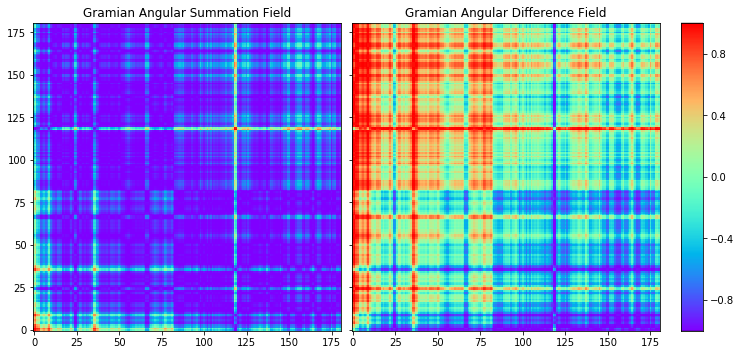

In [581]:
# Parameters
n_samples, n_timestamps = 1, 181

# Toy dataset
rng = np.random.RandomState(41)
X = rng.randn(n_samples, n_timestamps)

# Transform the time series into Gramian Angular Fields
gasf = GramianAngularField(image_size=181, method='summation')
#X_gasf = gasf.fit_transform(X)
X_gasf = gasf.fit_transform(train.reshape(1, -1))
gadf = GramianAngularField(image_size=181, method='difference')
#X_gadf = gadf.fit_transform(X)
X_gadf = gadf.fit_transform(train.reshape(1, -1))
# Show the images for the first time series
fig = plt.figure(figsize=(12, 7))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(1, 2),
                 axes_pad=0.15,
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="7%",
                 cbar_pad=0.3,
                 )
images = [X_gasf[0], X_gadf[0]]
titles = ['Gramian Angular Summation Field',
          'Gramian Angular Difference Field']
for image, title, ax in zip(images, titles, grid):
    im = ax.imshow(image, cmap='rainbow', origin='lower')
    ax.set_title(title)
ax.cax.colorbar(im)
ax.cax.toggle_label(True)
plt.show()


In [524]:
# Parameters
n_samples, n_timestamps = 100, 144
# Toy dataset
rng = np.random.RandomState(41)
X = rng.randn(n_samples, n_timestamps)


In [558]:
train.reshape(-1, 1).shape

(181, 1)

In [578]:
X = rng.randn(n_samples, n_timestamps)
gasf = GramianAngularField(image_size=181, method='summation')
X_gasf = gasf.fit_transform(X)

In [586]:
range(20)

range(0, 20)

In [1]:
from pandas import read_csv
import pandas as pd
from pandas import datetime
from matplotlib import pyplot
import numpy as np
 
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
#def parser(x):
	#return datetime.strptime('190'+x, '%-%M-%d')
# Simulate an ARIMA(2,1,1) model 
# alphas=[0.5,-0.25] 
# betas=[-0.5]
import seaborn as sns
from statsmodels.tsa.arima_process import arma_generate_sample


ARMA1 = []
for seeds in range(0, 2000):
    np.random.seed(seeds)
    max_lag = 30

    n = int(204)
    burn = 2000

    alphas = np.array([0.5,-0.25])
    betas = np.array([-0.5])

    ar = np.r_[1, -alphas]
    ma = np.r_[1, betas]

    arma11 = arma_generate_sample(ar=ar, ma=ma, nsample=n, burnin=burn)
    series1 = arma11.cumsum()
    ARMA1.append(series1)
    #pyplot.plot(series)
    
    
ARMA2 = []
for seeds in range(0, 2000):
    np.random.seed(seeds)
    max_lag = 30

    n = int(204)
    burn = 2000

    alphas = np.array([0.97,-0.25])
    betas = np.array([0])

    ar = np.r_[1, -alphas]
    ma = np.r_[1, betas]

    arma11 = arma_generate_sample(ar=ar, ma=ma, nsample=n, burnin=burn)
    series2 = arma11.cumsum()
    ARMA2.append(series2)
    #pyplot.plot(series)

In [2]:
ARMA1 = pd.DataFrame(ARMA1)
ARMA2 = pd.DataFrame(ARMA2)
ARMA_all = pd.concat([ARMA1, ARMA2])

size = int(len(ARMA_all) * 0.888)
train, test = ARMA_all[0:size], ARMA_all[size:len(ARMA_all)]
print(train.shape)
print(test.shape)

(3552, 204)
(448, 204)


In [617]:
ARMA_all.shape

(4000, 204)

In [615]:

# univariate data preparation
from numpy import array
 
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
 
# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# summarize the data
for i in range(len(X)):
	print(X[i], y[i])

[10 20 30] 40
[20 30 40] 50
[30 40 50] 60
[40 50 60] 70
[50 60 70] 80
[60 70 80] 90


In [600]:


# Parameters
n_samples, n_timestamps = 3552, 181

# Toy dataset
rng = np.random.RandomState(41)
X = rng.randn(n_samples, n_timestamps)

# Transform the time series into Gramian Angular Fields
gasf = GramianAngularField(image_size=181, method='summation')
#X_gasf = gasf.fit_transform(X)
X_gasf = gasf.fit_transform(train.reshape(1, -1))
gadf = GramianAngularField(image_size=181, method='difference')
#X_gadf = gadf.fit_transform(X)
X_gadf = gadf.fit_transform(train.reshape(1, -1))
# Show the images for the first time series
fig = plt.figure(figsize=(12, 7))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(1, 2),
                 axes_pad=0.15,
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="7%",
                 cbar_pad=0.3,
                 )
images = [X_gasf[0], X_gadf[0]]
titles = ['Gramian Angular Summation Field',
          'Gramian Angular Difference Field']
for image, title, ax in zip(images, titles, grid):
    im = ax.imshow(image, cmap='rainbow', origin='lower')
    ax.set_title(title)
ax.cax.colorbar(im)
ax.cax.toggle_label(True)
plt.show()




In [ ]:

# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [622]:
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis
import numpy as np
s1 = np.array([0., 0, 1, 2, 1, 0, 1, 0, 0, 2, 1, 0, 0])
s2 = np.array([0., 1, 2, 3, 1, 0, 0, 0, 2, 1, 0, 0, 0])
path = dtw.warping_path(s1, s2)
dtwvis.plot_warping(s1, s2, path, filename="warp2.png")

(None, None)

2.0
[[0.                inf        inf        inf        inf        inf
         inf        inf        inf        inf        inf]
 [       inf 0.         1.         2.23606798 3.74165739 3.87298335
  4.35889894 4.47213595 4.47213595 4.47213595 4.47213595]
 [       inf 0.         1.         2.23606798 3.74165739 3.87298335
  4.35889894 4.47213595 4.47213595 4.47213595 4.47213595]
 [       inf 1.         0.         1.         2.23606798 2.23606798
  2.44948974 2.44948974 2.64575131 2.82842712 3.        ]
 [       inf 2.23606798 1.         0.         1.         1.41421356
  1.41421356 1.73205081 2.64575131 3.31662479 3.46410162]
 [       inf 2.44948974 1.         1.         2.         1.
  1.41421356 1.41421356 1.73205081 2.         2.23606798]
 [       inf 2.44948974 1.41421356 2.23606798 3.16227766 1.41421356
  2.23606798 1.73205081 1.41421356 1.41421356 1.41421356]
 [       inf 2.64575131 1.41421356 1.73205081 2.64575131 1.41421356
  1.73205081 1.73205081 1.73205081 1.73205081 1.732050

(<matplotlib.figure.Figure at 0x7f75ce7eef28>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7f75ce67e160>])

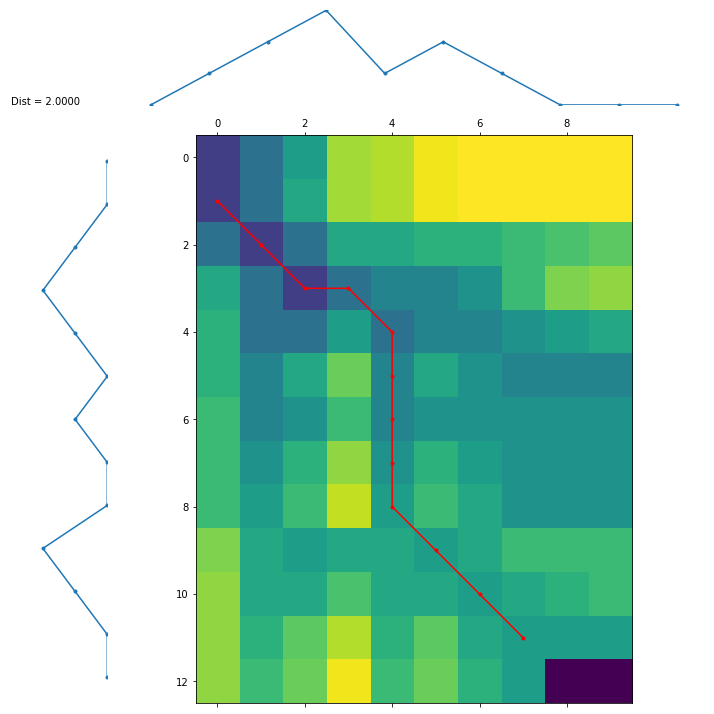

In [627]:
from dtaidistance import dtw
s1 = np.array([0., 0, 1, 2, 1, 0, 1, 0, 0, 2, 1, 0, 0])
s2 = np.array([0., 1, 2, 3, 1,  2, 1, 0, 0, 0])
distance, paths = dtw.warping_paths(s1, s2)
print(distance)
print(paths)
#The matrix with all warping paths can be visualised as follows:

from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis
import numpy as np
#x = np.arange(0, 20, .5)
#s1 = np.sin(x)
#s2 = np.sin(x - 1)
d, paths = dtw.warping_paths(s1, s2, window=25, psi=2)
best_path = dtw.best_path(paths)
dtwvis.plot_warpingpaths(s1, s2, paths, best_path)

In [3]:
ARMA_matrix = np.matrix(ARMA_all)

In [5]:
ARMA_matrix[1:20]

matrix([[ 0.44127714,  0.27901542, -0.47994446, ..., -3.85853303,
         -2.60148443, -3.48090086],
        [ 0.98066237,  2.28884484,  2.16327141, ..., 11.56075693,
         10.84825256, 11.02811655],
        [ 1.06431603,  1.20200736,  1.24536599, ...,  4.14418392,
          5.28438465,  7.85658465],
        ...,
        [-0.64838596, -0.56735163, -0.78268356, ..., -4.87782561,
         -4.55071967, -5.9392576 ],
        [-0.71376961, -1.14331747, -1.10004532, ..., 11.81503916,
         12.16887775, 12.96680423],
        [ 0.66304333,  0.12820041,  0.72387241, ..., 16.49790687,
         16.35326573, 15.46829408]])

In [6]:
from dtaidistance import dtw
import numpy as np
series = np.matrix([
    [0.0, 0, 1, 2, 1, 0, 1, 0, 0],
    [0.0, 1, 2, 0, 0, 0, 0, 0, 0],
    [0.0, 0, 1, 2, 1, 0, 0, 0, 0]])
ds = dtw.distance_matrix_fast(ARMA_matrix[1:10])

In [29]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10


from dtaidistance import clustering
# Custom Hierarchical clustering
model1 = clustering.Hierarchical(dtw.distance_matrix_fast, {})
cluster_idx = model1.fit(ARMA_matrix)
# Augment Hierarchical object to keep track of the full tree
model2 = clustering.HierarchicalTree(model1)
cluster_idx = model2.fit(ARMA_matrix)
# SciPy linkage clustering
model3 = clustering.LinkageTree(dtw.distance_matrix_fast, {})
cluster_idx = model3.fit(ARMA_matrix)

  8%|▊         | 301/4000 [00:22<04:40, 13.17it/s]


 15%|█▌        | 603/4000 [00:45<04:17, 13.21it/s]


 23%|██▎       | 905/4000 [01:08<03:56, 13.11it/s]


 30%|███       | 1203/4000 [01:31<03:31, 13.21it/s]


 37%|███▋      | 1499/4000 [01:54<03:10, 13.15it/s]


 45%|████▍     | 1795/4000 [02:16<02:47, 13.15it/s]


 52%|█████▏    | 2091/4000 [02:39<02:26, 13.03it/s]


 60%|█████▉    | 2387/4000 [03:01<02:01, 13.24it/s]


 67%|██████▋   | 2683/4000 [03:24<01:40, 13.04it/s]


 74%|███████▍  | 2979/4000 [03:46<01:18, 13.07it/s]


 82%|████████▏ | 3275/4000 [04:09<00:55, 13.15it/s]


 89%|████████▉ | 3571/4000 [04:32<00:32, 13.25it/s]


 97%|█████████▋| 3867/4000 [04:54<00:10, 13.22it/s]


100%|█████████▉| 3999/4000 [05:23<00:00, 13.16it/s]

(<matplotlib.figure.Figure at 0x7f34cc2cf128>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f348e9bec18>,
       dtype=object))

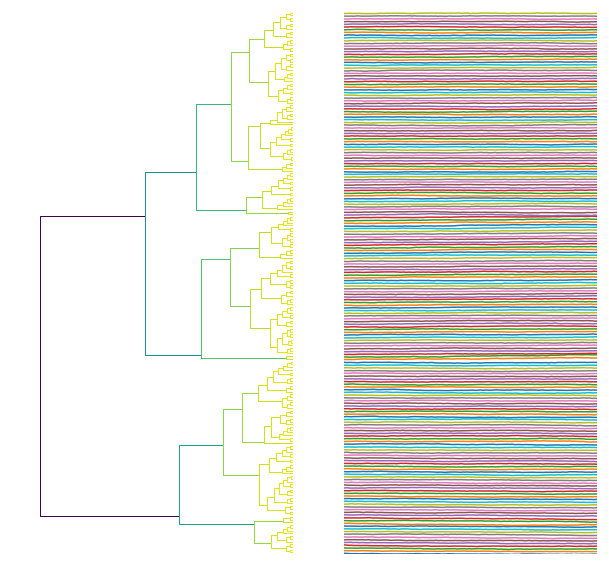

In [27]:
model3.plot()

In [26]:
cluster_idx

In [28]:
cluster_idx